# Buliding classification model

## Data prepreocessing

In [148]:
import pandas as pd
import numpy as np
import random
random.seed(0)
np.random.seed(0)

In [149]:
def open_data(fname: str ='training.txt')->pd.DataFrame:
    """
    Open training data and convert data to DataFrame.
    """
    data_list = []
    with open(fname,'r',encoding='utf-8') as fh:
        for i in fh:
            i = i.strip() # remove redunat while space
            i = i[1:-1] # remove "{", "}"
            i = i.split(',') 
            attr_list = [-1. for x in range(5)]
            attr_list[2] = 0 # basic
            for attr in i:
                attr = attr.split()
                attr_type = attr[0]
                attr_value = attr[1]
                if attr_value.isnumeric():
                    attr_value = float(attr_value)
                if attr_type == '0': # marital_status
                    if attr_value == 'S':
                        attr_list[0] = 0.
                    elif attr_value == 'M':
                        attr_list[0] = 1.
                        
                elif attr_type == '1': # num_children
                    attr_list[1] = attr_value
                    
                elif attr_type == '2': # member_card
                    if attr_value == 'Normal':
                        attr_list[2] = 1.
                    elif attr_value == 'Silver':
                        attr_list[2] = 2.
                    elif attr_value == 'Gold': 
                        attr_list[2] = 3.
                        
                elif attr_type == '3': # age
                    attr_list[3] = attr_value
                    
                elif attr_type == '4': # year_income
                    attr_list[4] = attr_value
            data_list.append(attr_list)
    df = pd.DataFrame(data_list, columns =['marital_status', 'num_children','member_card', 'age','year_income'])
    return df

In [150]:
traindf = open_data()
traindf

,marital_status,num_children,member_card,age,year_income
0,-1.0,1.0,0.0,39.0,100000.0
1,1.0,-1.0,3.0,85.0,80000.0
2,1.0,1.0,3.0,90.0,20000.0
3,-1.0,-1.0,1.0,31.0,20000.0
4,1.0,-1.0,0.0,49.0,40000.0
...,...,...,...,...,...
486,1.0,-1.0,1.0,82.0,20000.0
487,-1.0,5.0,1.0,31.0,20000.0
488,1.0,3.0,3.0,52.0,40000.0
489,1.0,3.0,2.0,27.0,40000.0


In [151]:
cvdf = open_data('test.txt')
cvdf

,marital_status,num_children,member_card,age,year_income
0,1.0,1.0,0.0,59.0,60000.0
1,-1.0,3.0,2.0,43.0,160000.0
2,1.0,2.0,0.0,52.0,120000.0
3,1.0,2.0,1.0,30.0,60000.0
4,-1.0,-1.0,0.0,73.0,60000.0
...,...,...,...,...,...
206,1.0,-1.0,0.0,87.0,40000.0
207,1.0,1.0,0.0,32.0,40000.0
208,-1.0,1.0,0.0,87.0,40000.0
209,1.0,1.0,0.0,39.0,80000.0


In [152]:
from sklearn.utils import shuffle
traindf = shuffle(traindf)
traindf

,marital_status,num_children,member_card,age,year_income
238,-1.0,2.0,0.0,39.0,80000.0
179,1.0,3.0,0.0,55.0,80000.0
438,-1.0,2.0,0.0,49.0,80000.0
325,-1.0,-1.0,0.0,81.0,80000.0
15,-1.0,1.0,0.0,81.0,60000.0
...,...,...,...,...,...
323,1.0,2.0,0.0,39.0,40000.0
192,-1.0,-1.0,0.0,58.0,60000.0
117,1.0,-1.0,0.0,87.0,40000.0
47,1.0,-1.0,2.0,73.0,60000.0


In [153]:
def count_missing_val(Train=True):
    """
    Count missing value in data.
    """
    if Train:
        df = traindf
        print('[Training data]')
    else:
        df = cvdf
        print('[Validation data]')
    count = 0
    for idx in range(len(df)):
        a,b,c,d,e = df.iloc[idx]

        if (a==-1.) or (b==-1.) or (c==-1.) or (d==-1.) or (e==-1.):
            count += 1
    
    print('Total row:',len(df))
    print('Missing row:',count)
    print()

In [154]:
count_missing_val()
count_missing_val(False)

[Training data]
Total row: 491
Missing row: 320

[Validation data]
Total row: 211
Missing row: 136



### Spliting   feature X and label y

In [155]:
train_X = traindf[['marital_status','num_children','age','year_income']].values
print('train_X:',train_X.shape)

train_y = traindf['member_card'].values
print('train_y:',train_y.shape)

train_X: (491, 4)
train_y: (491,)


In [156]:
cv_X = cvdf[['marital_status','num_children','age','year_income']].values
print('cv_X:',cv_X.shape)

cv_y = cvdf['member_card'].values
print('cv_y:',cv_y.shape)

cv_X: (211, 4)
cv_y: (211,)


### Feature normalization

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))

In [158]:
X_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.fit_transform(cv_X)

## check label balance

In [159]:
def check_balance(Train=True):
    if Train:
        df = traindf
        print('[Training]')
    else:
        df = cvdf
        print('[Validation]')
        
    len0 = len(df[df['member_card']==0])
    len1 = len(df[df['member_card']==1])
    len2 = len(df[df['member_card']==2])
    len3 = len(df[df['member_card']==3])
    
    max_ = max([len0, len1, len2, len3])
    
    weights = [max_/len0, max_/len1, max_/len2, max_/len3]

    print('Num of label basic:',len0)
    print('Num of label normal:',len1)
    print('Num of label silver:',len2)
    print('Num of label gold:',len3)
    print('-'*20)
    print('weights:',weights)
    print('Total:',len0+len1+len2+len3)
    print('Len of df:',len(df))
    print()
    
    return weights

In [160]:
weights = check_balance()
_ = check_balance(False)

[Training]
Num of label basic: 254
Num of label normal: 79
Num of label silver: 65
Num of label gold: 93
--------------------
weights: [1.0, 3.2151898734177213, 3.9076923076923076, 2.7311827956989245]
Total: 491
Len of df: 491

[Validation]
Num of label basic: 126
Num of label normal: 26
Num of label silver: 33
Num of label gold: 26
--------------------
weights: [1.0, 4.846153846153846, 3.8181818181818183, 4.846153846153846]
Total: 211
Len of df: 211



## pytorch

### Prepare dataset

In [161]:
import torch
import torch.nn as nn
torch.manual_seed(0)
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm

In [162]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('GPU is avalible')
    print('Working on ',torch.cuda.get_device_name())
else:
    device = torch.device('cpu')
    print('GPU is not avalible')

GPU is not avalible


In [163]:
class Data(Dataset):
    # Constructor
    def __init__(self, X, y):
        self.x = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).long()
        self.len = len(X)
            
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [164]:
train_set = Data(X_scaled, train_y)
cv_set = Data(X_test_scaled, cv_y)

### building model and training function

In [165]:
def train(model, train_loader, cv_loader, optimizer ,N_train, N_test, epochs=20):

    N_train=N_train
    N_test=N_test
 
    useful_stuff = {'train_cost':[], 'train_acc':[], 'valid_cost':[], 'valid_acc':[]} 
    for epoch in tqdm(range(epochs)):
        #training===========================================
        model.train() 
        correct = 0
        training_loss=[]
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            z = model(x)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y).sum().item()
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            training_loss.append(loss.data.item())   

        useful_stuff['train_cost'].append(np.mean(training_loss))
        useful_stuff['train_acc'].append(correct / N_train)

        #valid==================================================
        model.eval() 
        correct = 0
        cv_loss=[]
        with torch.no_grad():
            for x_test, y_test in cv_loader:
                x_test, y_test = x_test.to(device), y_test.to(device)
                z = model(x_test)
                _, yhat = torch.max(z.data, 1)
                correct += (yhat == y_test).sum().item()
                loss = criterion(z, y_test)         
                cv_loss.append(loss.data.item())

        useful_stuff['valid_cost'].append(np.mean(cv_loss))
        useful_stuff['valid_acc'].append(correct / N_test)

        scheduler.step(np.mean(cv_loss)) # ***learning rate scheduler*** <----

    return useful_stuff

In [166]:
class NN(nn.Module):
    def __init__(self, input_dim, hidden_dim, droprate, num_class):
        super(NN, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.droprate = droprate
        self.num_class = num_class

        self.feature = nn.Sequential(
            #0
            nn.Linear(self.input_dim, self.hidden_dim),
            nn.BatchNorm1d(self.hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=self.droprate),
            #1
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.BatchNorm1d(self.hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=self.droprate),
            #2
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.BatchNorm1d(self.hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=self.droprate),
            #3
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.BatchNorm1d(self.hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=self.droprate),
            #
            nn.Linear(self.hidden_dim, self.num_class),
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.squeeze()
        return x

In [167]:
def init_weights(m):
    """
    Apply He initializayion in linear layer.
    """
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_uniform_(m.weight)
        m.bias.data.fill_(0.01)

In [168]:
model = NN(input_dim=4, hidden_dim=10, droprate=0.1, num_class=4) #<--------dropout rate
model.apply(init_weights)
model.to(device)

NN(
  (feature): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.1, inplace=False)
    (16): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [169]:
from torchsummary import summary
summary(model.to(device), (10,4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 10]              50
       BatchNorm1d-2               [-1, 10, 10]              20
              ReLU-3               [-1, 10, 10]               0
           Dropout-4               [-1, 10, 10]               0
            Linear-5               [-1, 10, 10]             110
       BatchNorm1d-6               [-1, 10, 10]              20
              ReLU-7               [-1, 10, 10]               0
           Dropout-8               [-1, 10, 10]               0
            Linear-9               [-1, 10, 10]             110
      BatchNorm1d-10               [-1, 10, 10]              20
             ReLU-11               [-1, 10, 10]               0
          Dropout-12               [-1, 10, 10]               0
           Linear-13               [-1, 10, 10]             110
      BatchNorm1d-14               [-1,

### hyperparameters

In [170]:
class_weights = torch.FloatTensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
learning_rate = 5e-4

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.1)

bs = 32
train_loader = DataLoader(dataset=train_set, batch_size=bs, shuffle=True)
cv_loader = DataLoader(dataset=cv_set, batch_size=1024)
N_train = len(train_set)
N_test = len(cv_set)
useful_stuff = train(model=model, train_loader=train_loader, cv_loader=cv_loader, optimizer=optimizer, N_train=N_train, N_test=N_test, epochs=200)

## Metrics

In [171]:
def calc_metric(useful_stuff,train=True):
    if train:
        loss = useful_stuff['train_cost'][-1]
        acc = useful_stuff['train_acc'][-1]
        print('training acc:', acc)
        print('training loss:', loss)
    else:
        loss =useful_stuff['valid_cost'][-1]
        acc = useful_stuff['valid_acc'][-1]
        print('validation acc:', acc)
        print('validation loss:', loss)
    print()

## Learning curve

In [172]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

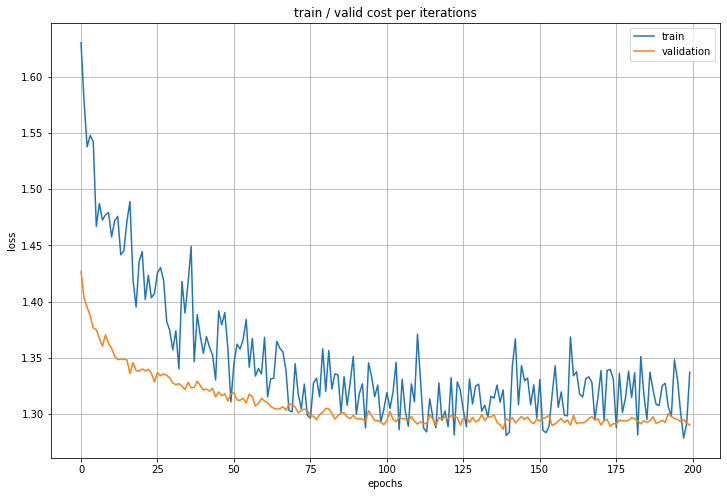

training acc: 0.35845213849287166
training loss: 1.337266854941845

validation acc: 0.3981042654028436
validation loss: 1.290447473526001



In [173]:
plt.plot(useful_stuff['train_cost'], label = 'train')
plt.plot(useful_stuff['valid_cost'], label = 'validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.title('train / valid cost per iterations')
# axes = plt.gca()
# axes.set_ylim([0, 1])
plt.grid()
plt.show()

calc_metric(useful_stuff)
calc_metric(useful_stuff, train=False)

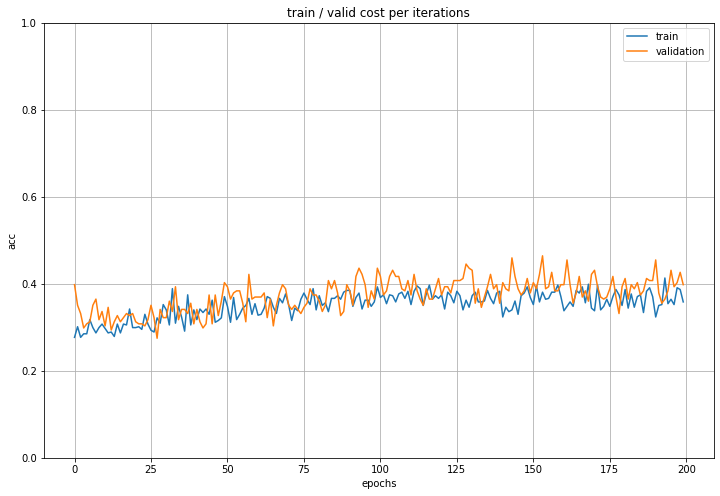

training acc: 0.35845213849287166
training loss: 1.337266854941845

validation acc: 0.3981042654028436
validation loss: 1.290447473526001



In [174]:
plt.plot(useful_stuff['train_acc'], label = 'train')
plt.plot(useful_stuff['valid_acc'], label = 'validation')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.title('train / valid cost per iterations')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.grid()
plt.show()

calc_metric(useful_stuff)
calc_metric(useful_stuff, train=False)